<a href="https://colab.research.google.com/github/MSz-HA/aiid2024-mitsi/blob/main/Lab01_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metody i techniki sztucznej inteligencji
<b>Lab 1</b> <br>
<b>mgr inż. Adam Zalewski</b>

# Wczytanie zbioru danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("updated_pollution_dataset.csv")

In [4]:
dataset.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [5]:
dataset.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [6]:
dataset.duplicated().sum()

0

In [8]:
dataset.isnull().sum()/dataset.shape[0]

Temperature                      0.0
Humidity                         0.0
PM2.5                            0.0
PM10                             0.0
NO2                              0.0
SO2                              0.0
CO                               0.0
Proximity_to_Industrial_Areas    0.0
Population_Density               0.0
Air Quality                      0.0
dtype: float64

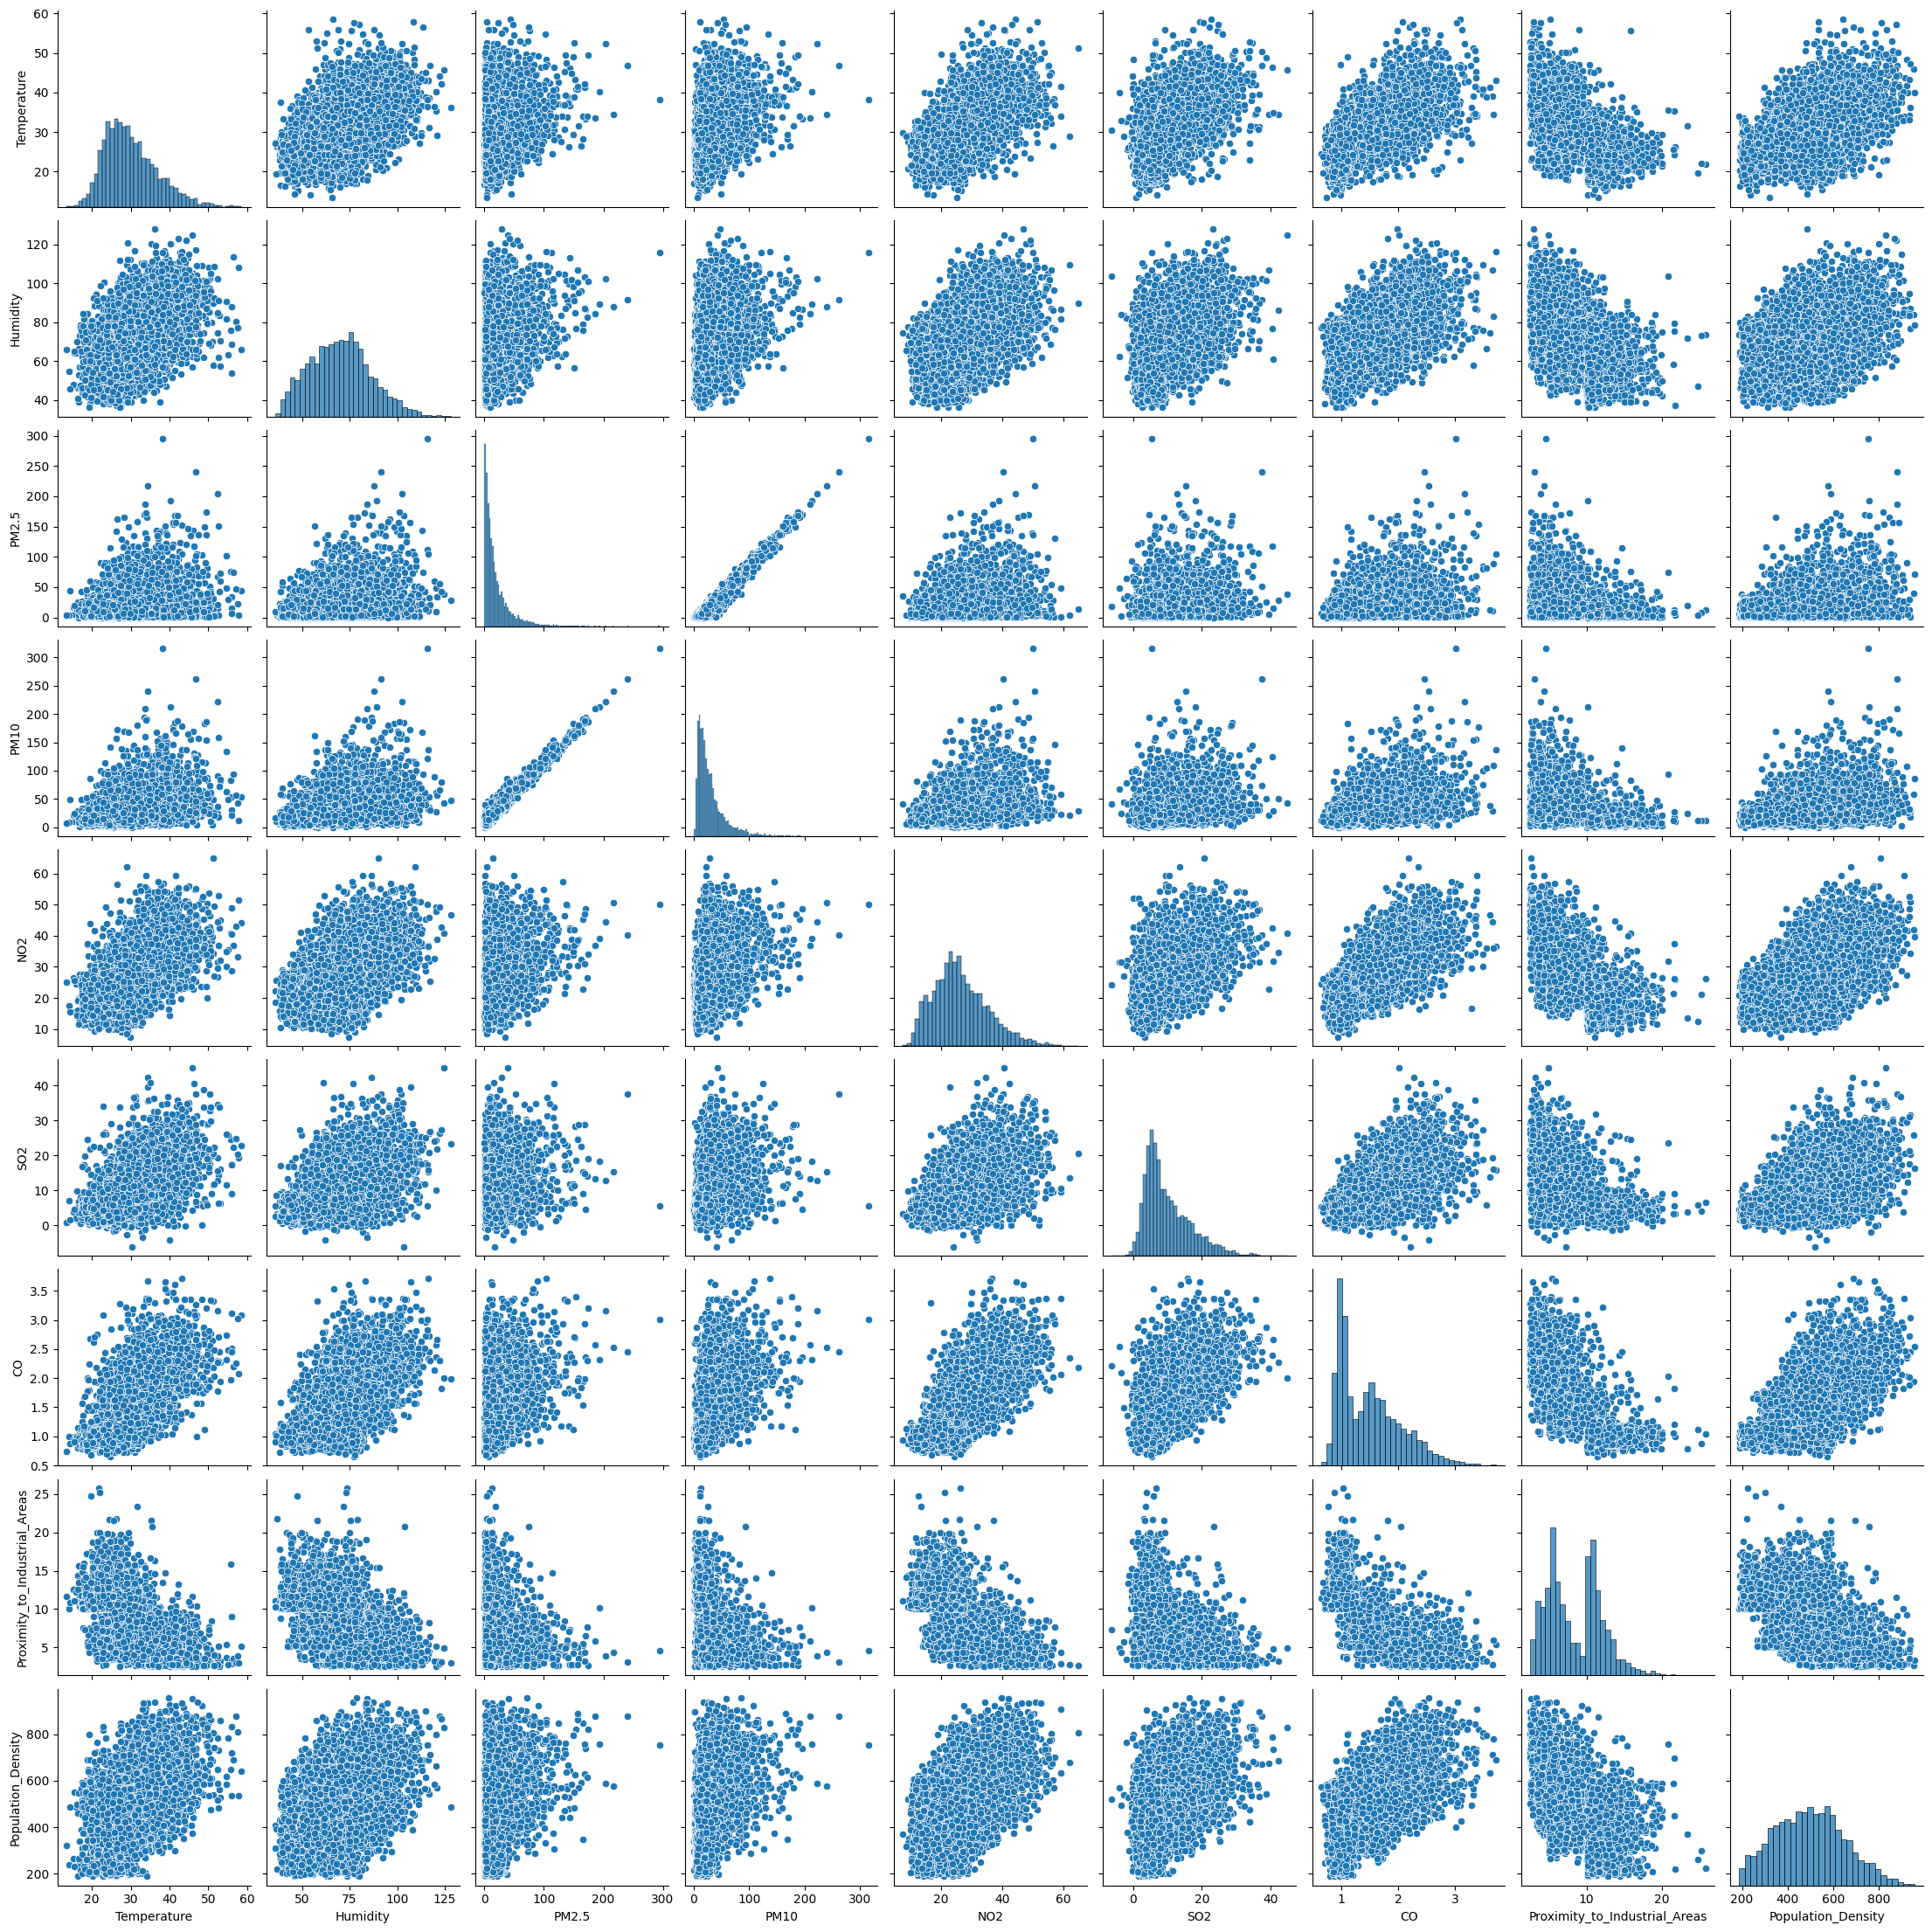

In [9]:
sns.pairplot(dataset)

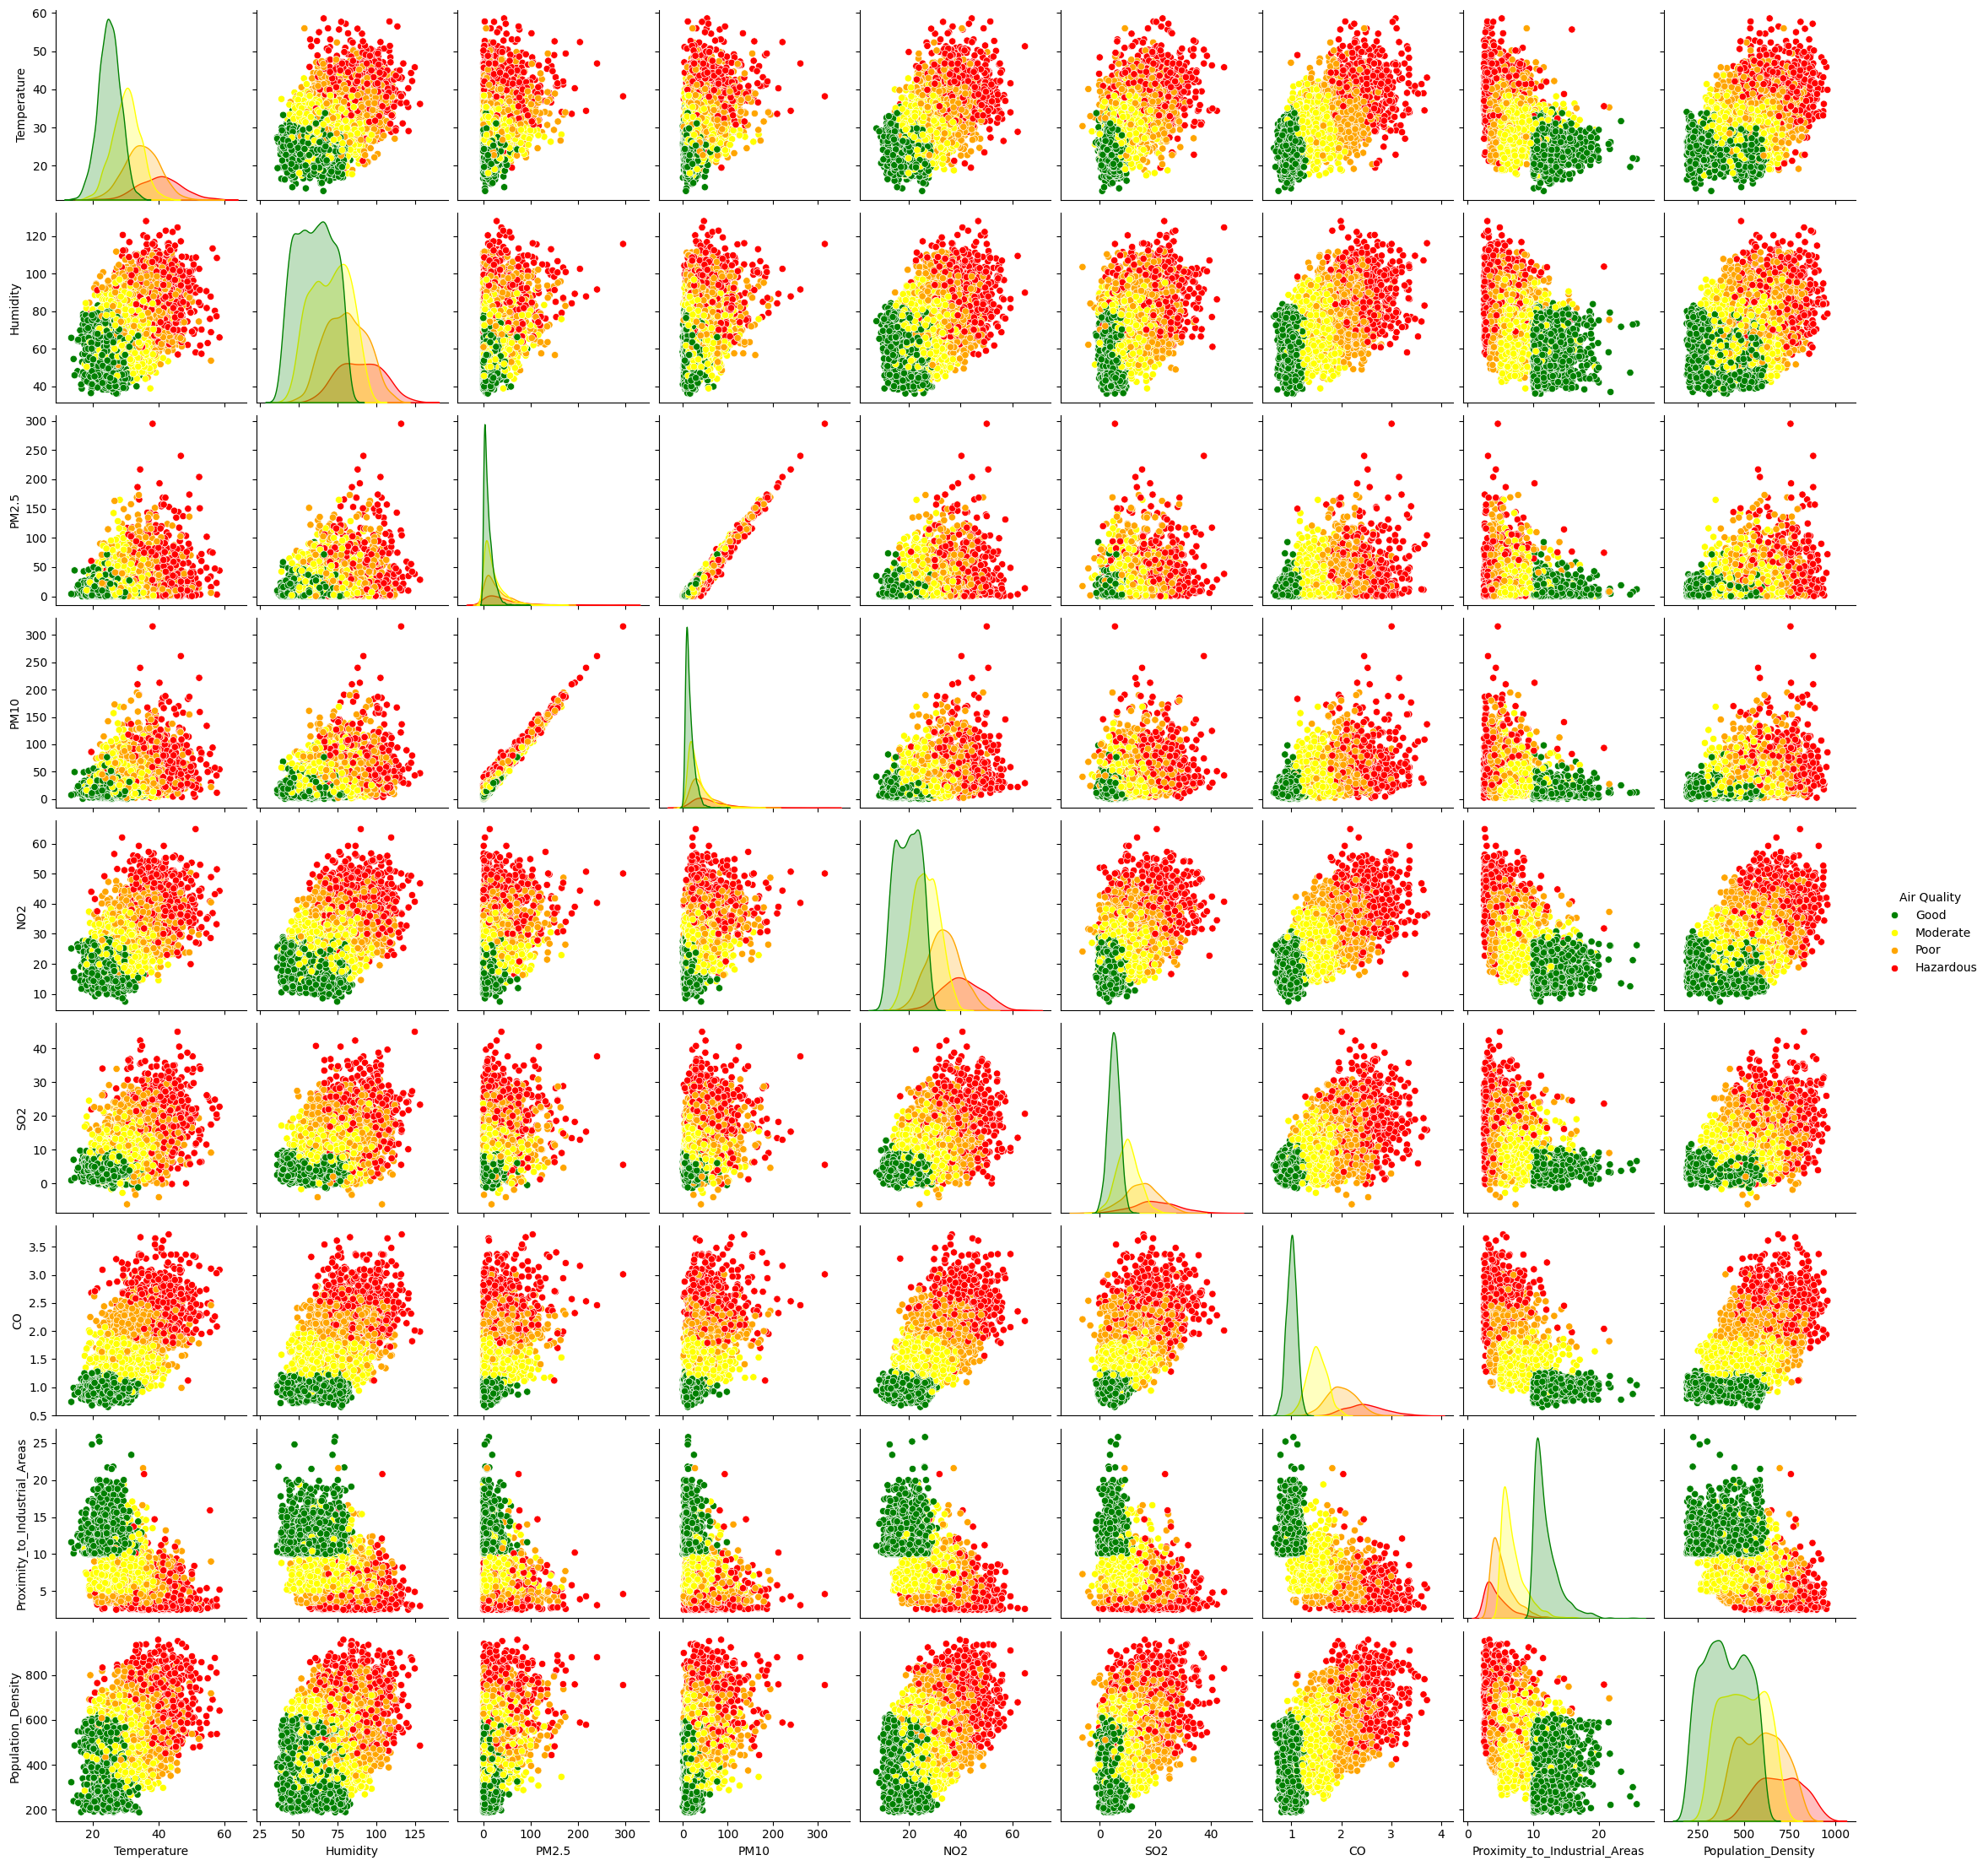

In [11]:
sns.pairplot(dataset,
             hue="Air Quality",
             hue_order=["Good", "Moderate", "Poor", "Hazardous"],
             palette={"Good":"green", "Moderate":"yellow", "Poor":"orange", "Hazardous":"red"})

<Axes: >

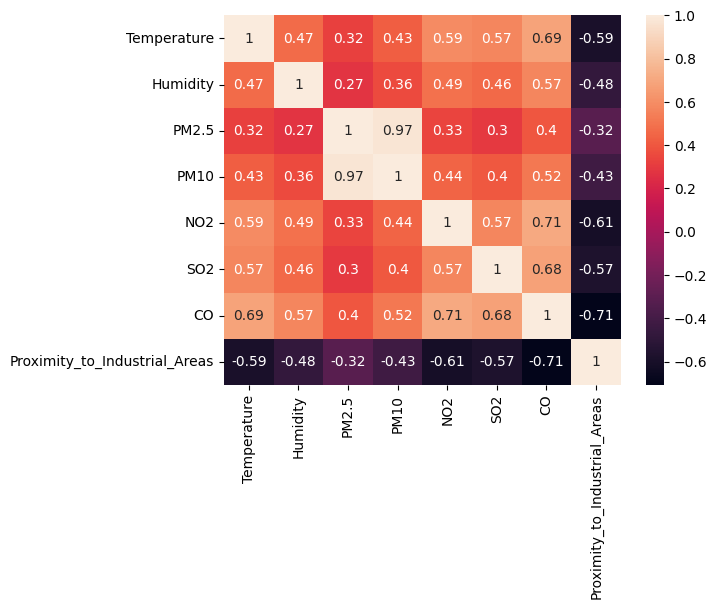

In [13]:
sns.heatmap(dataset.select_dtypes("float64","int64").corr(), annot=True)

# Prosta regresja liniowa

Text(0, 0.5, 'PM10')

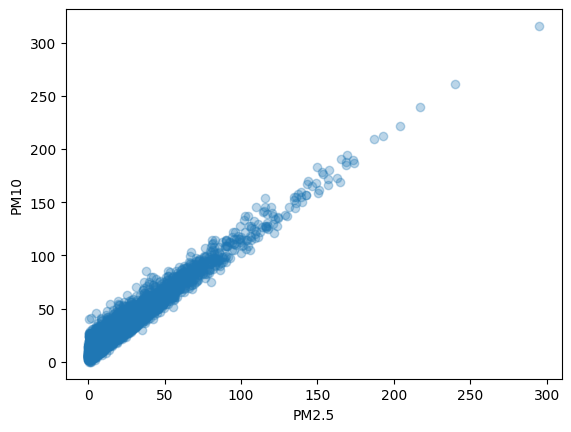

In [18]:
plt.scatter(dataset["PM2.5"],
            dataset["PM10"],
            marker="o",
            alpha=0.3
           )
plt.xlabel("PM2.5")
plt.ylabel("PM10")

In [19]:
import numpy as np

In [20]:
x = dataset["PM2.5"]
y = dataset["PM10"]

In [22]:
w1 = sum((x-np.mean(x))*(y-np.mean(y)))/sum((x-np.mean(x))**2)
w1

1.0837465623439042

In [23]:
w0 = np.mean(y)-w1*np.mean(x)
w0

8.38938501675036

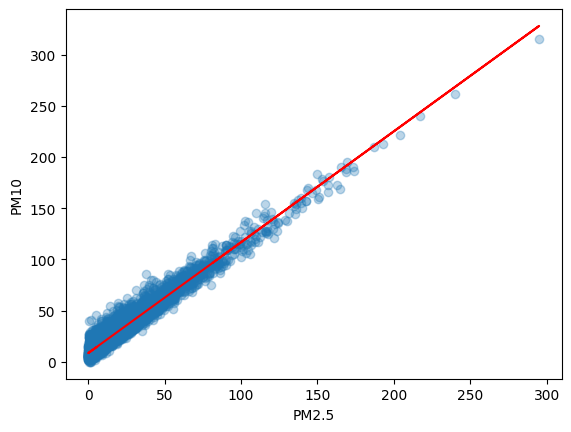

In [24]:
plt.scatter(dataset["PM2.5"],
            dataset["PM10"],
            marker="o",
            alpha=0.3
           )
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.plot(x, w0+w1*x, color="red")

# Prosta regresja liniowa z gradientem

In [46]:
w0=0
w1=0

errors = []

epochs = 1000
learning_rate = 0.000001
for e in range(epochs):
  for i in range(len(x)):
    pred = w0 + w1 * x[i]
    delta = pred - y[i]

    errors += [delta]

    w0 = w0 - learning_rate * delta
    w1 = w1 - learning_rate * delta * x[i]

  #print(f"Epoch: {e}, w0: {w0}, w1: {w1}")

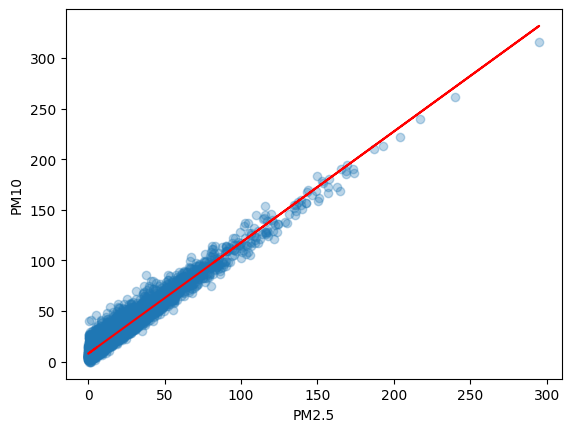

In [47]:
plt.scatter(dataset["PM2.5"],
            dataset["PM10"],
            marker="o",
            alpha=0.3
           )
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.plot(x, w0+w1*x, color="red")

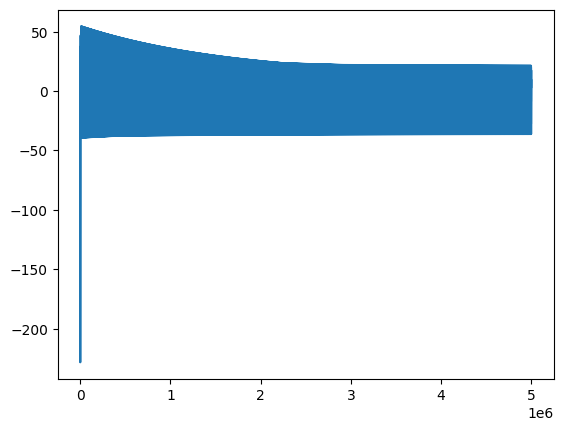

In [48]:
plt.plot(range(1,epochs*len(x)+1), errors)

# Regresja liniowa

# Regresja Ridge

# Regresja Lasso

# Regresja ElasticNet